### 모듈 설치

In [ ]:
!pip install pyforest

In [ ]:
!pip install mediapipe

In [ ]:
import cv2 
import mediapipe as mp 
import time 

### 미디어파이프(Mediapipe)는 구글에서 인체를 대상으로 하는 인식에 대해 다양한 형태로 기능과 모델까지 제공하는 서비스입니다. Python 이외에도 다양한 프로그램언어와 환경에서에서 사용하기 편리한 라이브러리 형태로 제공되며 설치 후 즉시 간편하게 사용이 가능합니다.

아래는 실행코드입니다.

In [ ]:
cap = cv2.VideoCapture(0)

cTime=0 
pTime=0

mpFaceDetection = mp.solutions.face_detection
FaceDetection = mpFaceDetection.FaceDetection()
mpDraw = mp.solutions.drawing_utils 


while True:
    success, img = cap.read()    
    
    img_RGB = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    results = FaceDetection.process(img_RGB)
    
    if results.detections:
        for id, detection in enumerate(results.detections):
#              mpDraw.draw_detection(img, detection)
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, ic = img.shape
            bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih),\
                   int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(img, bbox, (0,255,255),2)
            cv2.putText(img,f'{int(detection.score[0]*100)}%',(bbox[0],bbox[1]-20),cv2.FONT_HERSHEY_PLAIN,3,(0,255,255),2)

    cTime = time.time()
    fps = 1/(cTime - pTime)
    pTime = cTime 
    cv2.putText(img,str(int(fps)),(10,70),cv2.FONT_HERSHEY_PLAIN,3,(0,255,255),3)
    cv2.imshow("image",img)
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

변형 코드 
cap =  cv2.VideoCapture("video/1.mp4") -> cap = cv2.VideoCapture(0)

변형 이유: 비디오 보단 웹캠을 통한 실시간 인식을 시도하고 싶었습니다.

### 결과

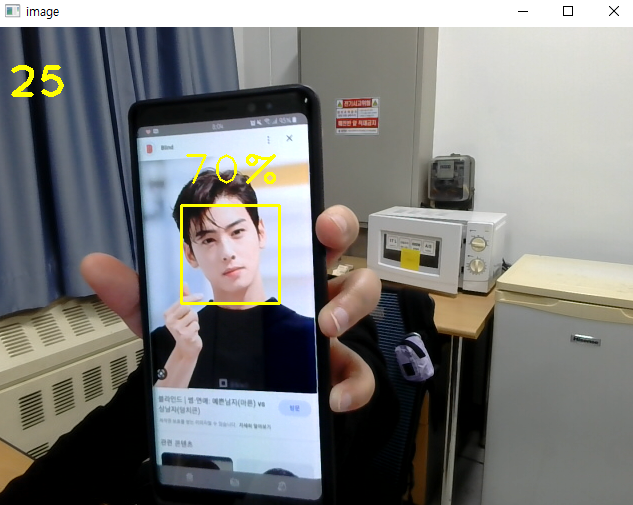